# Lab HW 1
Fatima Yousuf

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Organize data into lists

x = list(range(1,11))
y = [3, 6, 19, 33, 50, 77, 103, 130, 166, 205]
y_uncertainty = [1, 3, 4, 10, 10, 4, 3, 1, 7, 2]

### Part A 
Determine whether the measurements of y at x=1 and x=2 are distinguishable use a t' test

In [137]:
def t_prime(A, dA, B, dB):
    return abs(A - B) / np.sqrt(dA**2 + dB**2)

# Calculate distinguishability by doing the t prime test.
distinguishability = t_prime(y[0], y_uncertainty[0], y[1], y_uncertainty[1])
print(f"t' test result: {distinguishability}")

# Use result of t' test to determine if the data points are distinguishable
if distinguishability > 3:
    print("Distinguishable")
elif distinguishability <= 1:
    print("Indistinguishable")
else:
    print("Uncertain")

t' test result: 0.9486832980505138
Indistinguishable


### Part B
Use linearization techniques to qualitatively evaluate whether the relationship between x and y is linear, exponential, or follows a power law

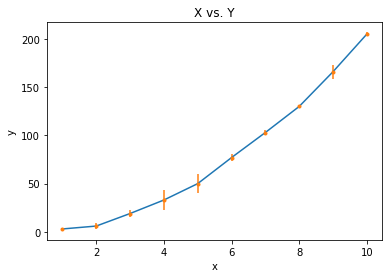

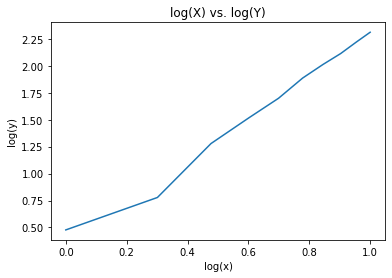

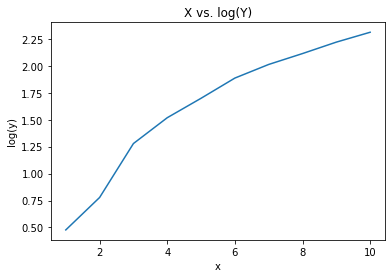

In [138]:
# Plot x vs. y
plt.plot(x,y)
plt.errorbar(x, y, y_uncertainty, fmt='.')
plt.title("X vs. Y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Plot log(x) vs. log(y)
x_log = np.log10(x)
y_log = np.log10(y)
plt.plot(x_log,y_log)
plt.title("log(X) vs. log(Y)")
plt.xlabel("log(x)")
plt.ylabel("log(y)")
plt.show()

# Plot x vs. log(y)
plt.plot(x,y_log)
plt.title("X vs. log(Y)")
plt.xlabel("x")
plt.ylabel("log(y)")
plt.show()

It seems that the log-log graph is the most linear, qualitatively speaking. So, the relationship between x and y is likely exponential and must be of the form $y=Ax^{n}$

### Part C
Use least-squares fitting methods to qunatitatively (i.e., through a $𝜒^{2}$ value) evaluate whether the relationship between x and y is linear, exponential, or follows a power law.

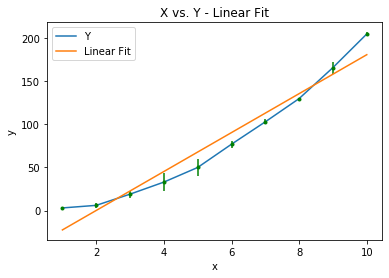

Chi Squared: 86.2590549413325


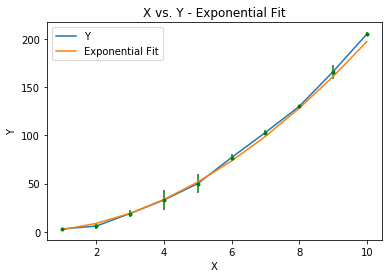

Chi Squared: 2.284846440140951


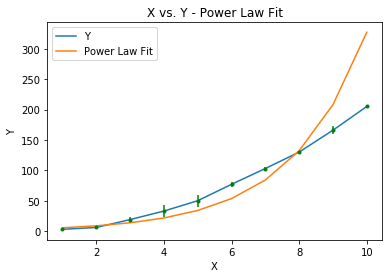

Chi Squared: 385.7014786776024


In [139]:
def least_squares_fit(x, y):
    '''
    Does a least squares linear fit on a given dataset.
    Returns values for m and b (Linear fit is of the form: y=mx+b)
    '''
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum([(x[i]*y[i]) for i in range(n)])
    sum_x2 = sum([(x[i]**2) for i in range(n)])
    m = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x**2)
    b = (sum_y - m*sum_x) / n
    return m,b
    

def chi_squared(x, y, dy, f):
    '''
    Function Chi-Squared.  
    x, y and dy are numpy arrays, referring to x, y and the uncertainty in y respectively.
    f is the function we are fitting. 
    '''
    n = len(x)
    chi_squared = 0
    for i in range(n):
        f_x = f(x[i], m, b)
        diff = (f_x - y[i])**2 / (dy[i]**2)
        chi_squared += diff
    
    return chi_squared/n

################### Linear Fit ######################
# Plot x vs. y
plt.plot(x, y, label = "Y")
plt.errorbar(x, y, y_uncertainty, fmt='.', color="green")

# Calculate and plot linear fit
m,b = least_squares_fit(x, y)
def f_linear(x, m, b):
    return m*x+b
plt.plot(x, [f_linear(x[i], m, b) for i in range(len(x))], label = "Linear Fit")

# Add labels to graph
plt.title("X vs. Y - Linear Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Calculate chi squared value of fit
x2 = chi_squared(x, y, y_uncertainty, f_linear)
print(f"Chi Squared: {x2}")


################# Exponential Fit ###################
x_log = np.log10(x)
y_log = np.log10(y)

# Plot x vs. y
plt.plot(x, y, label = "Y")
plt.errorbar(x, y, y_uncertainty, fmt='.', color="green")

# Use the log-log plot to calculate the coefficients of the exponential fit
m,b = least_squares_fit(x_log, y_log)
def f_exponential(x, m, b):
    return (10**b) * (x**m)
plt.plot(x, [f_exponential(x[i], m, b) for i in range(len(x))], label = "Exponential Fit")

# Add labels to graph
plt.title("X vs. Y - Exponential Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();
plt.show()

# Calculate chi squared value of fit
x2 = chi_squared(x, y, y_uncertainty, f_exponential)
print(f"Chi Squared: {x2}")


################# Power Law Fit ####################
# Plot x vs. log(y)
plt.plot(x, y, label = "Y")
plt.errorbar(x, y, y_uncertainty, fmt='.', color="green")

# Use the semi-log plot to calculate the coefficients of the exponential fit
m,b = least_squares_fit(x, y_log)
def f_power_law(x, m, b):
    return (10**b)*((10**m)**x)
plt.plot(x, [f_power_law(x[i], m, b) for i in range(len(x))], label = "Power Law Fit")

# Add labels to graph
plt.title("X vs. Y - Power Law Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Calculate chi squared value of fit
x2 = chi_squared(x, y, y_uncertainty, f_power_law)
print(f"Chi Squared: {x2}")

In the previous problem, I linearized the data using log-log and semi-log graphs. I used a linear regression calculation to determine a linear fit for the linearized graphs of the form: y=mx+b. I took the coefficients m and b and worked backwards to find the coefficients for the exponential and power law fits. I graphed the results of these calculations, which are as follows:

- Linear Fit: $y=22.606x-45.133$
- Exponential Fit: $y=2.295x^{1.934}$ 
- Power Law Fit: $y=3.531*1.573^{x}$

The exponential fit is the best fit for the data. I proved this by doing a chi-squared calculation for each of the three fits. The exponential fit had the best chi-squared value, since it was less than 9 and greater than 1.

### Part D
Produce residuals graphs for your three fits in part c to further justify your interpretation of whether the relationship between x and y is linear, exponential, or follows a power law.

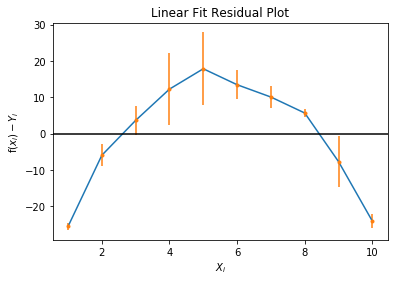

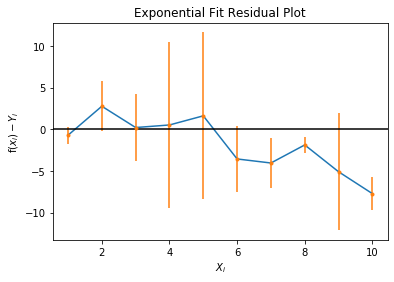

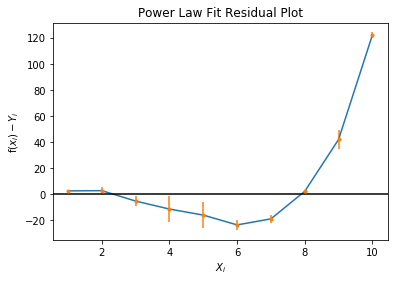

In [141]:
def plot_residuals():
    '''
    Takes the most recently defined residual array
    and plots it against the x-values. 
    a helpr functions intended to reduce repetition.
    '''
    plt.plot(x, residuals, label = "Y")
    plt.errorbar(x, residuals, y_uncertainty, fmt='.')
    plt.axhline(y=0, color='black')
    plt.xlabel("$X_i$")
    plt.ylabel("f($x_{i})-Y_{i}$")

# Linear fit residual plot
m,b = least_squares_fit(x, y)
residuals = [f_linear(x[i], m, b) - y[i] for i in range(len(x))]
plot_residuals()
plt.title("Linear Fit Residual Plot")
plt.show()

# Exponential fit residual plot
m,b = least_squares_fit(x_log, y_log)
residuals = [f_exponential(x[i], m, b) - y[i] for i in range(len(x))]

plot_residuals()
plt.title("Exponential Fit Residual Plot")
plt.show()

# Power Law fit residual plot
m,b = least_squares_fit(x, y_log)
residuals = [f_power_law(x[i], m, b) - y[i] for i in range(len(x))]
plot_residuals()
plt.title("Power Law Fit Residual Plot")
plt.show()

The residuals plot for the exponential fit had all residuals closest to zero, with around an equal number of residual points below and above 0. Moreover, most of the points' error bars cross the y=0 line. Hence, this further demonstrates that the exponential fit best fits the given datapoints.

### Part E
Given that the researchers expected the relationship between x and y to be exponential, what are three reasonable things the researchers could do next?

The data analysis shown here supported the researchers' hypothesis. As we can see, the relationship between the data given does seem exponential. The researchers also could:
1. Collect more datapoints for different values of x to verify that the relationship between x and y is indeed exponential.
2. Attempt to reduce uncertainty in measurements by taking more trials for each datapoint and value of x. They could also try using more accurate/precise tools.
3. Get someone else to look over their methods and analysis. It's usually good for the results and analyses of experiments to undergo peer review before publishing any conclusions. After all, the peer review process is a pretty significant part of publishing research! It would be helpful for someone else who is unbiased to go back and look through their data collection and analysis methods.